In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.shape

(8425, 23)

In [5]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [6]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [ ]:
# in this dataset huge problems of null and missing value 

In [7]:
# Handling missing values
numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 
                  'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
                  'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

categorical_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

# Impute missing values for numerical columns with mean
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Impute missing values for categorical columns with mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify if there are any missing values left
print(df.isnull().sum())


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8425 non-null   float64
 5   Evaporation    8425 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    8425 non-null   object 
 8   WindGustSpeed  8425 non-null   float64
 9   WindDir9am     8425 non-null   object 
 10  WindDir3pm     8425 non-null   object 
 11  WindSpeed9am   8425 non-null   float64
 12  WindSpeed3pm   8425 non-null   float64
 13  Humidity9am    8425 non-null   float64
 14  Humidity3pm    8425 non-null   float64
 15  Pressure9am    8425 non-null   float64
 16  Pressure3pm    8425 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

In [9]:
# Convert 'RainToday' and 'RainTomorrow' columns to binary format
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

print(df.dtypes)
print(df['RainToday'].value_counts())
print(df['RainTomorrow'].value_counts())


Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object
0    6435
1    1990
Name: RainToday, dtype: int64
0    6434
1    1991
Name: RainTomorrow, dtype: int64


In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,0.236202,0.236320
std,5.379488,6.114516,10.309308,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,0.424773,0.424846
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,0.000000,0.000000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,0.000000,0.000000
75%,17.300000,28.000000,1.400000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,0.000000,0.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000


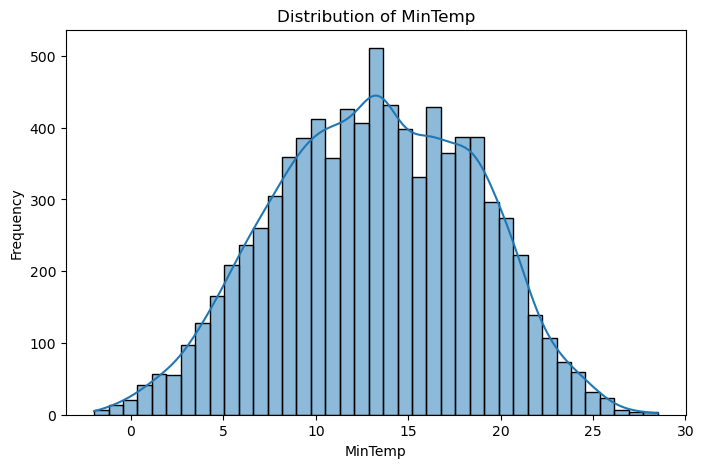

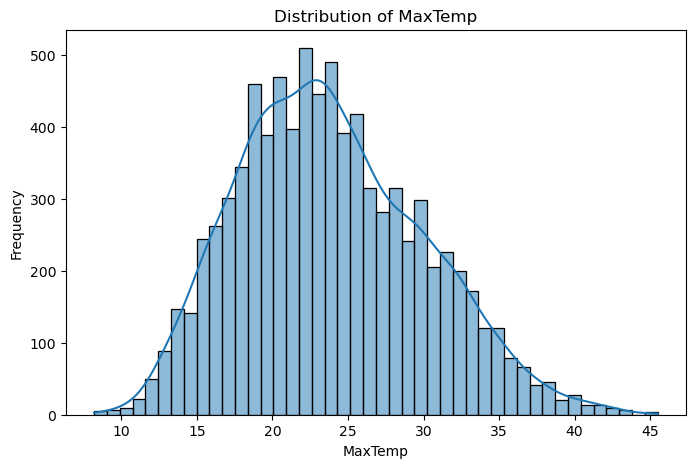

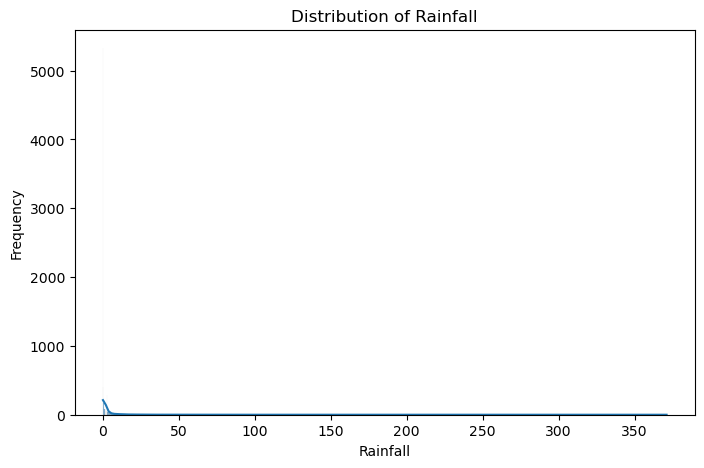

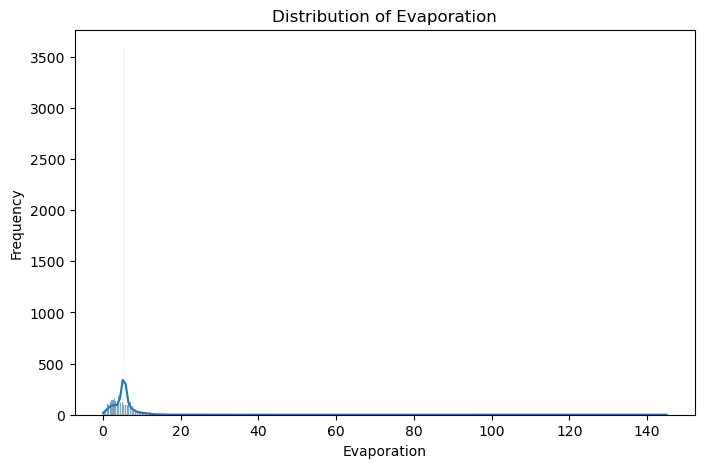

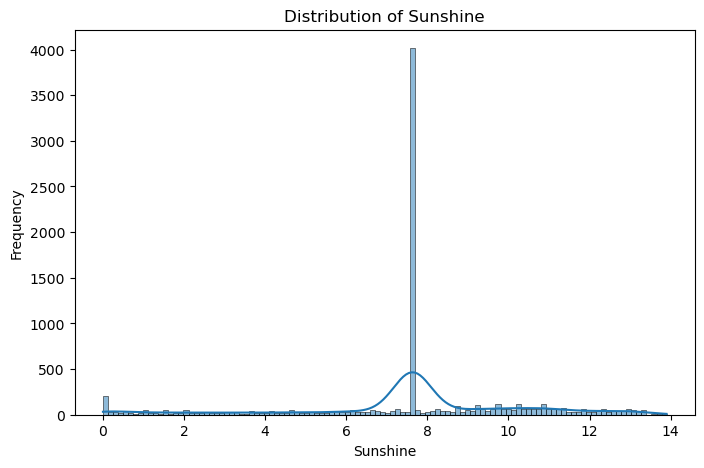

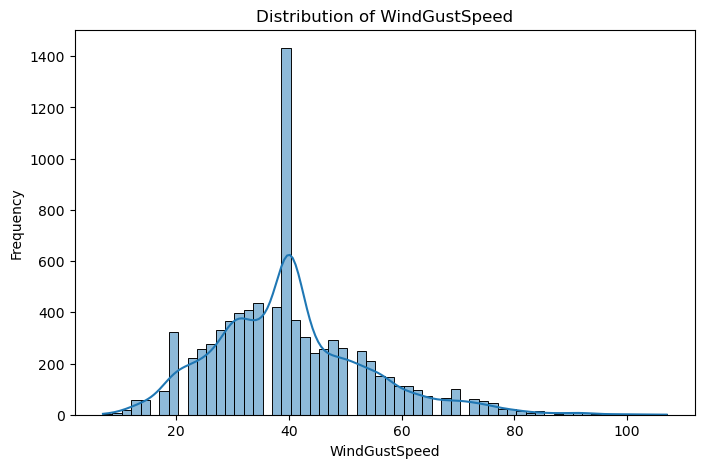

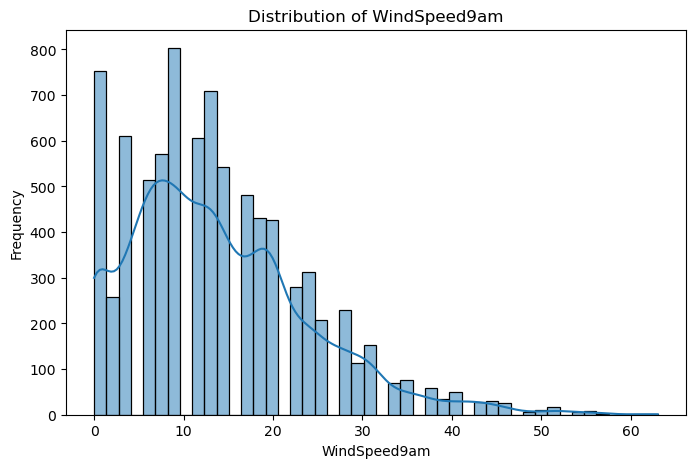

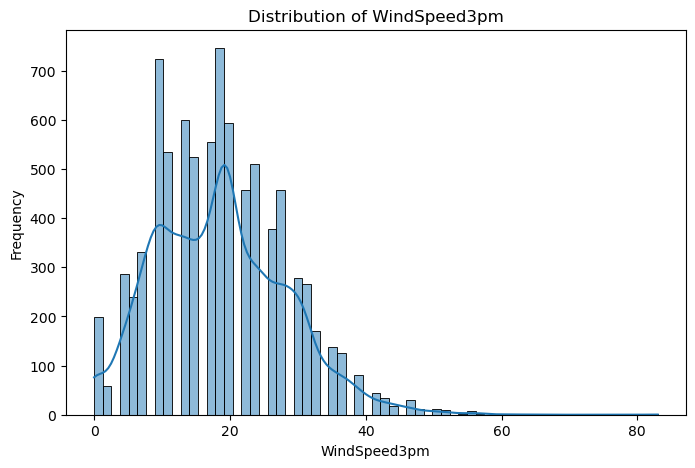

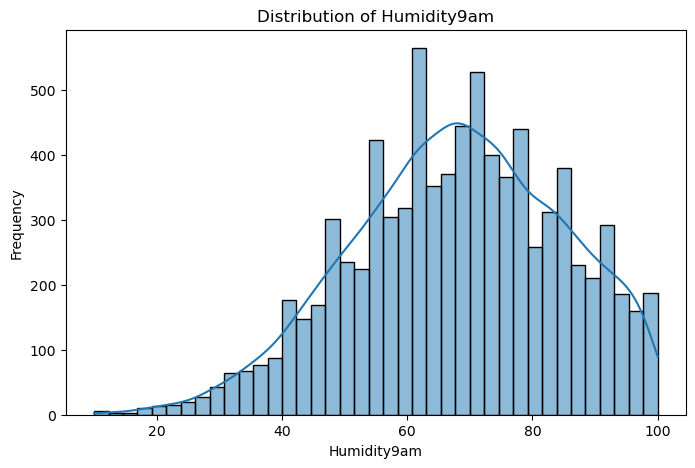

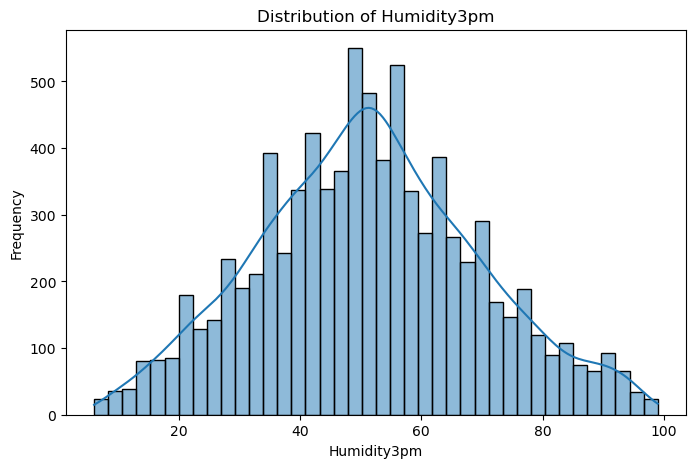

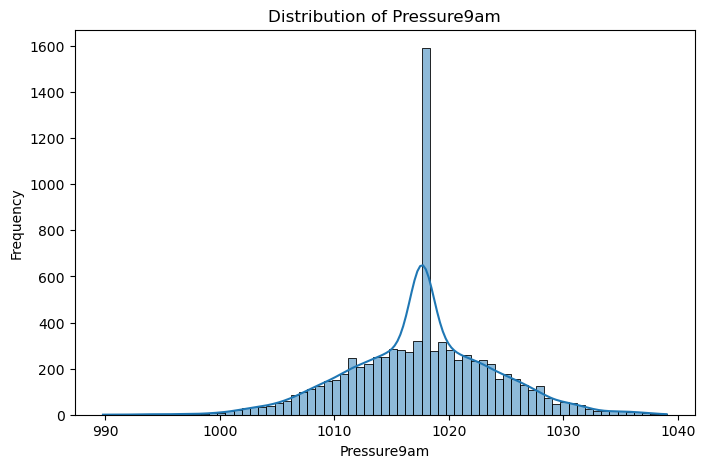

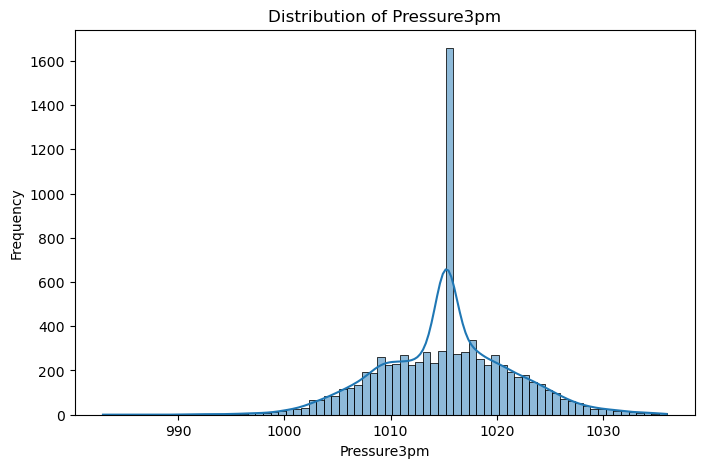

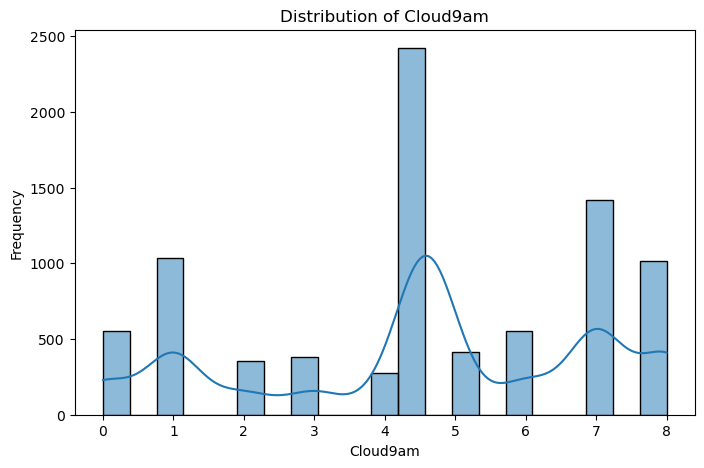

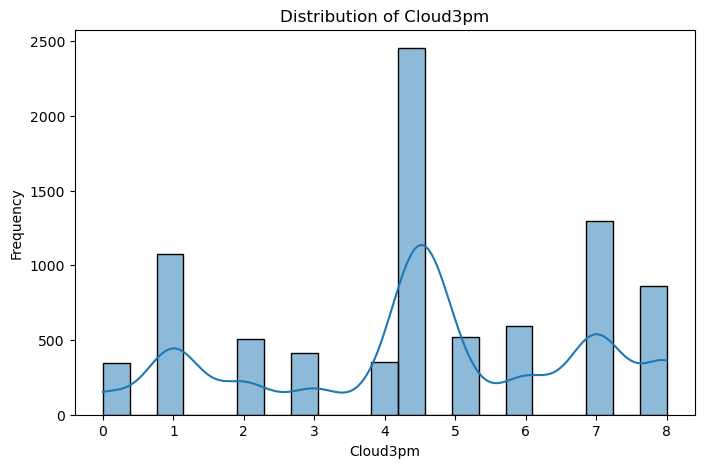

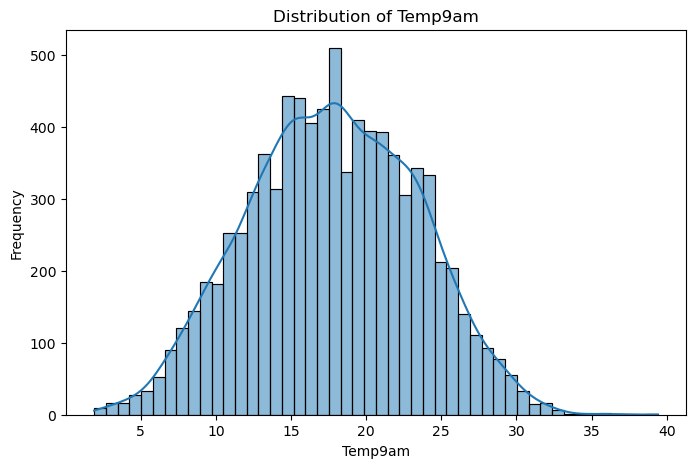

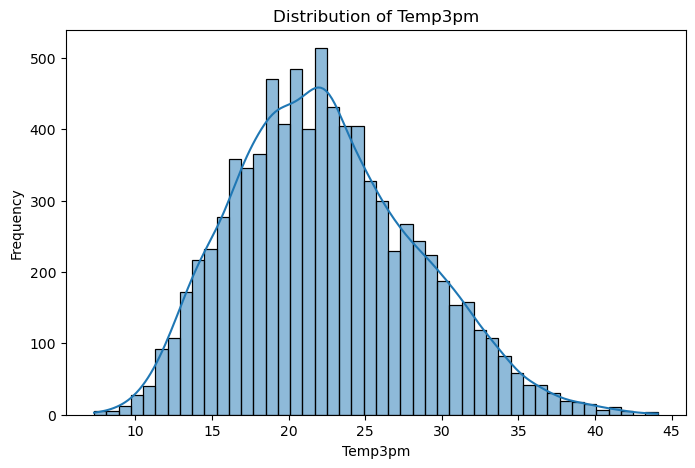

In [11]:
# Histogram for numerical columns
numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 
                  'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                  'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 
                  'Temp9am', 'Temp3pm']

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


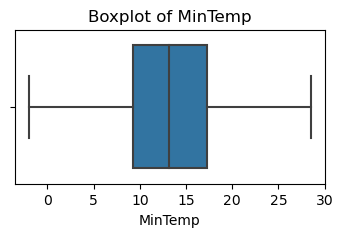

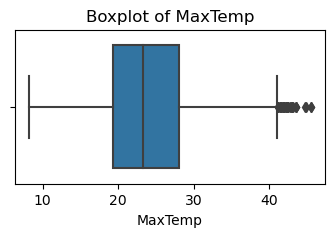

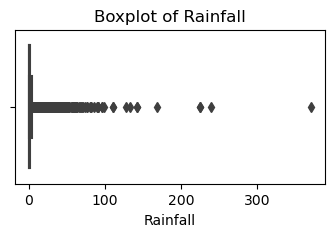

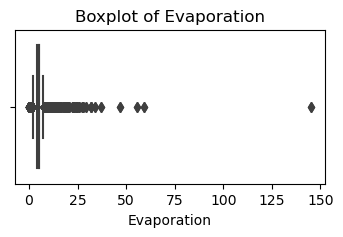

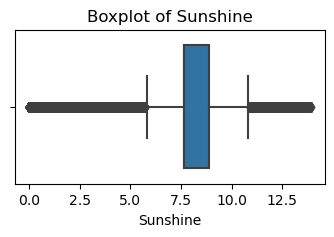

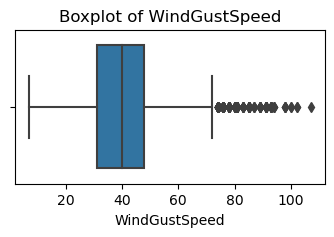

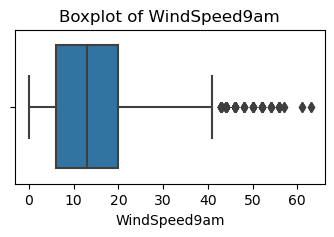

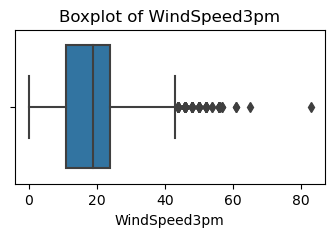

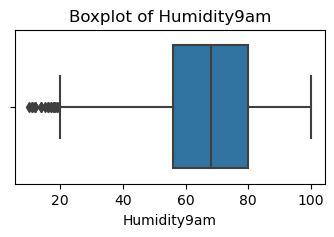

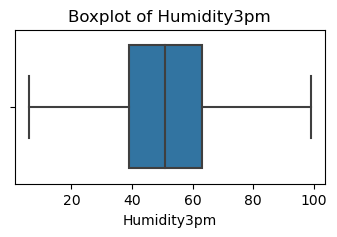

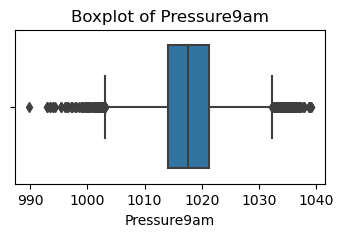

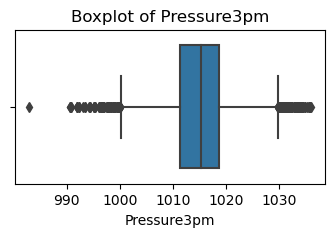

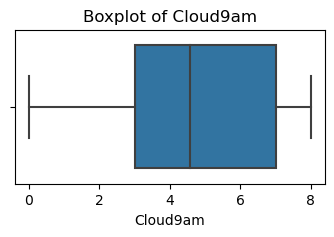

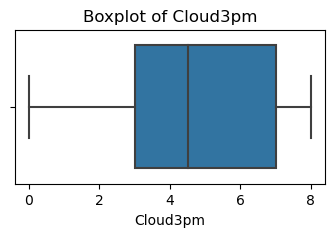

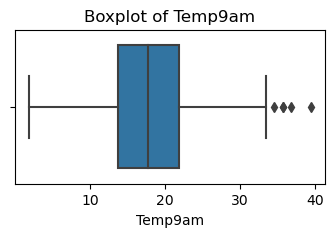

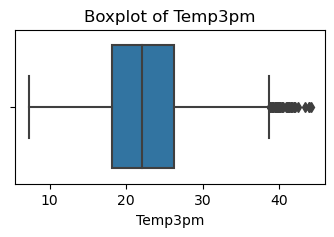

In [12]:
# Boxplot for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


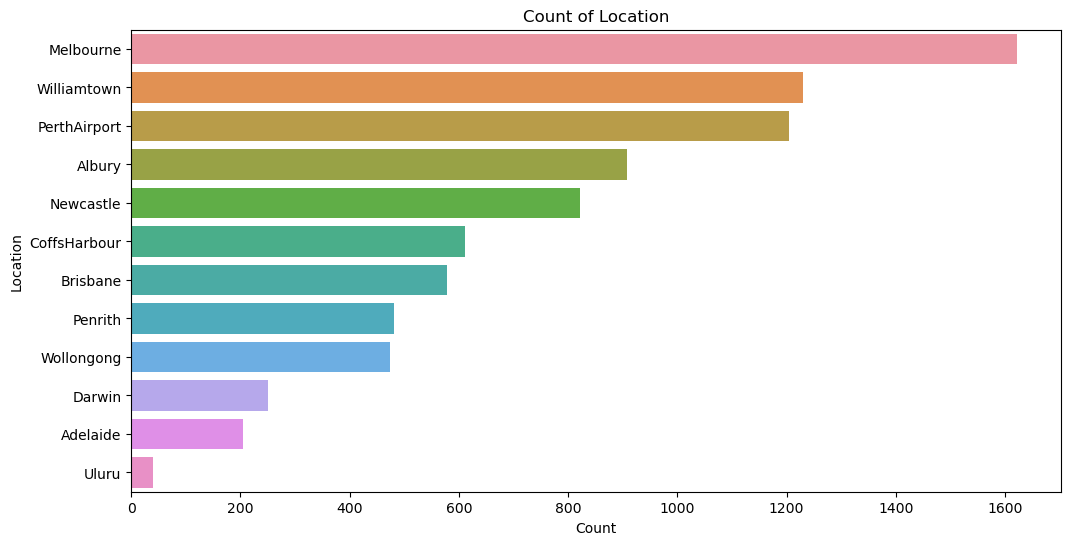

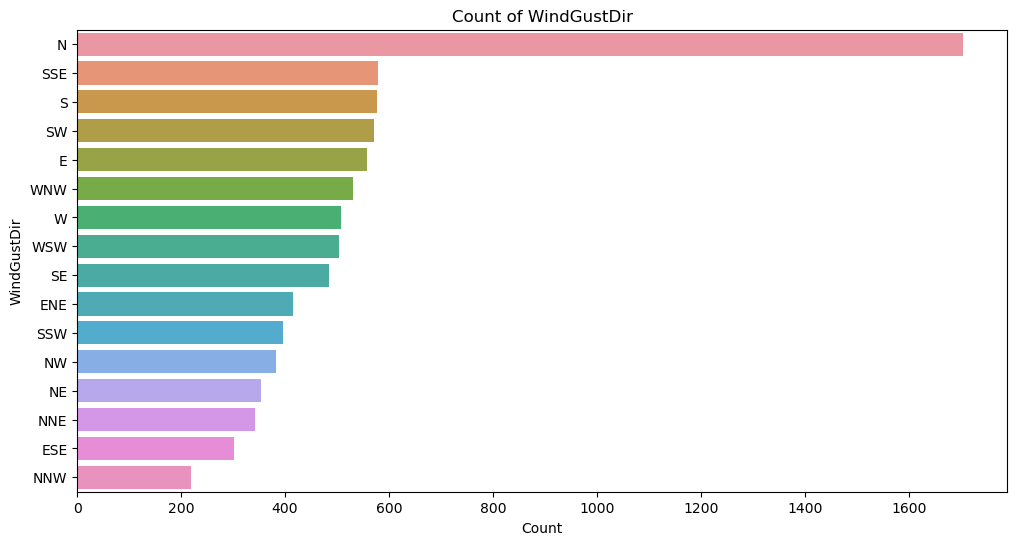

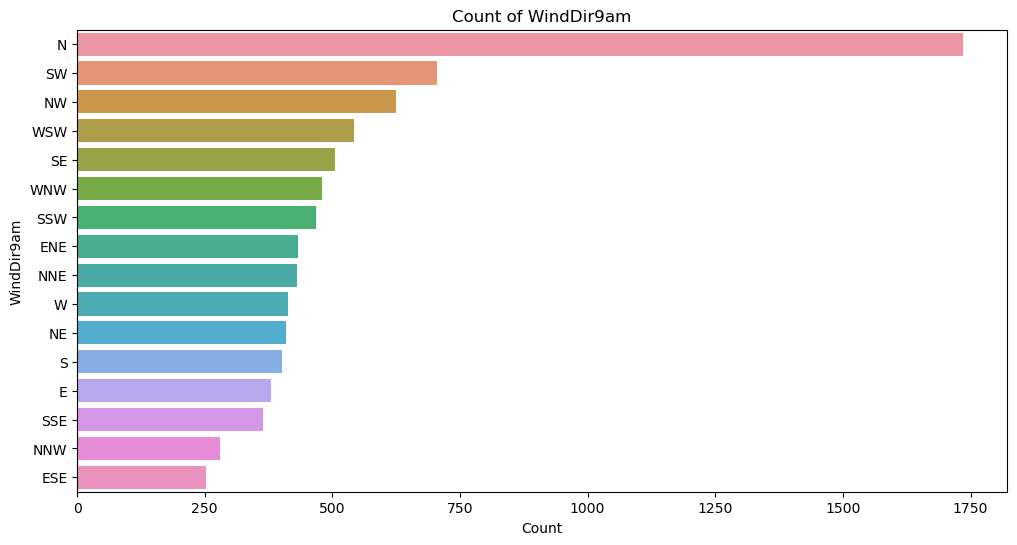

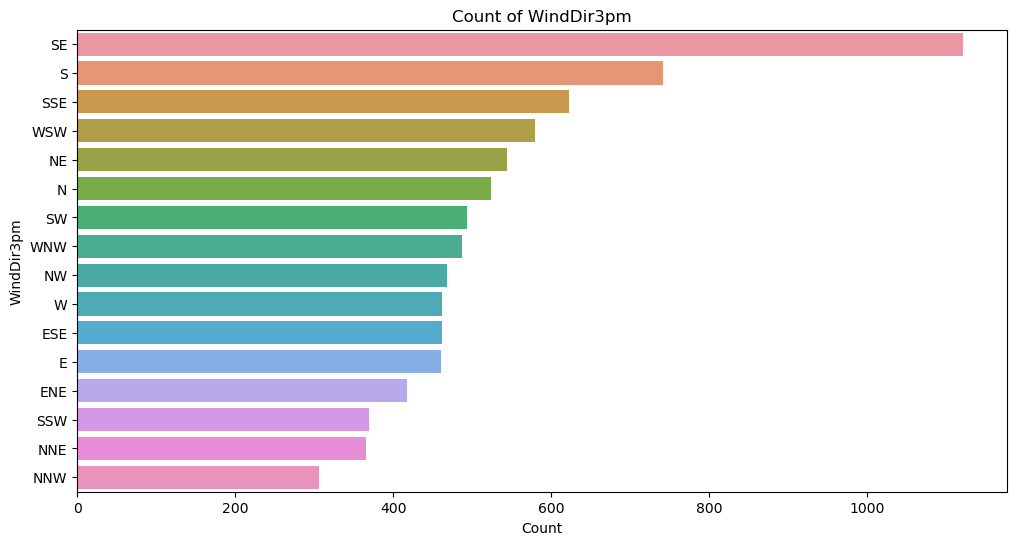

In [13]:
# Bar plots for categorical columns
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()


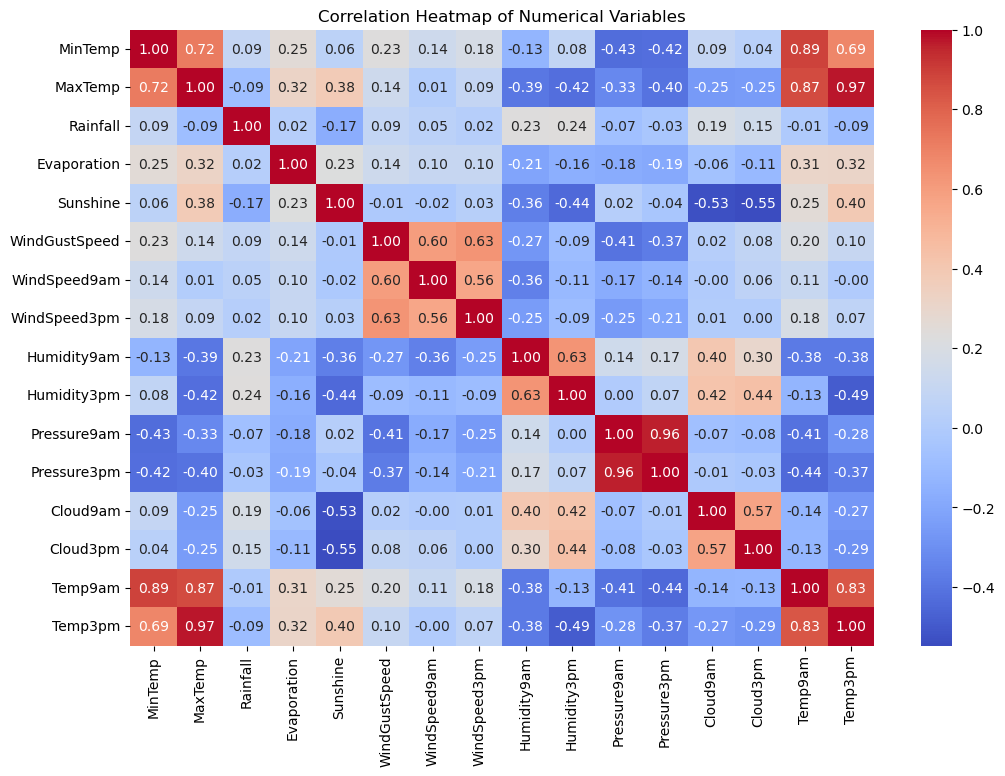

In [14]:
# Correlation heatmap for numerical columns
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target variables
X = df.drop(['RainTomorrow', 'Rainfall', 'Date'], axis=1)
y_classification = df['RainTomorrow']
y_regression = df['Rainfall']

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(exclude=['object']).columns

# Data split 
X_train, X_test, y_train_classification, y_test_classification, y_train_regression,
y_test_regression = train_test_split(X, y_classification, y_regression, test_size=0.2, random_state=42)

# One-hot encoding for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
)

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

print("Encoded X_train shape:", X_train_encoded.shape)
print("Encoded X_test shape:", X_test_encoded.shape)


Encoded X_train shape: (6740, 75)
Encoded X_test shape: (1685, 75)


In [17]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Model 2: Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_scaled, y_train_classification)

# Train and test scores
train_score_dt = model_dt.score(X_train_scaled, y_train_classification)
test_score_dt = model_dt.score(X_test_scaled, y_test_classification)

print(f"Decision Tree - Train Score: {train_score_dt:.2%}, Test Score: {test_score_dt:.2%}")

# Model 3: Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train_classification)

# Train and test scores
train_score_rf = model_rf.score(X_train_scaled, y_train_classification)
test_score_rf = model_rf.score(X_test_scaled, y_test_classification)

print(f"Random Forest - Train Score: {train_score_rf:.2%}, Test Score: {test_score_rf:.2%}")

# Model 4: Support Vector Machine (SVM)
model_svm = SVC(random_state=42)
model_svm.fit(X_train_scaled, y_train_classification)

# Train and test scores
train_score_svm = model_svm.score(X_train_scaled, y_train_classification)
test_score_svm = model_svm.score(X_test_scaled, y_test_classification)

print(f"SVM - Train Score: {train_score_svm:.2%}, Test Score: {test_score_svm:.2%}")

# Model 5: Gradient Boosting
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train_scaled, y_train_classification)

# Train and test scores
train_score_gb = model_gb.score(X_train_scaled, y_train_classification)
test_score_gb = model_gb.score(X_test_scaled, y_test_classification)

print(f"Gradient Boosting - Train Score: {train_score_gb:.2%}, Test Score: {test_score_gb:.2%}")


Decision Tree - Train Score: 100.00%, Test Score: 86.53%
Random Forest - Train Score: 100.00%, Test Score: 91.22%
SVM - Train Score: 90.45%, Test Score: 87.42%
Gradient Boosting - Train Score: 86.45%, Test Score: 86.47%


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train_classification)

# Get the best parameters
best_params = grid_search.best_params_

# Train and test scores for the best model
train_score_rf_tuned = grid_search.best_score_
test_score_rf_tuned = accuracy_score(y_test_classification, grid_search.predict(X_test_scaled))

print(f"Random Forest (Tuned) - Train Score: {train_score_rf_tuned:.2%}, Test Score: {test_score_rf_tuned:.2%}")
print("Best Hyperparameters:", best_params)


Random Forest (Tuned) - Train Score: 87.00%, Test Score: 91.10%
Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on the test set using the best model
y_pred_rf_tuned = grid_search.best_estimator_.predict(X_test_scaled)

# Classification Report and Confusion Matrix
classification_rep = classification_report(y_test_classification, y_pred_rf_tuned)
confusion_mat = confusion_matrix(y_test_classification, y_pred_rf_tuned)

# Conclusion
print("Random Forest Model (Tuned) - Conclusion:")
print("---------------------------------------------------")
print("Classification Report:")
print(classification_rep)
print("---------------------------------------------------")
print("Confusion Matrix:")
print(confusion_mat)
print("---------------------------------------------------")




Random Forest Model (Tuned) - Conclusion:
---------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1314
           1       0.88      0.69      0.77       371

    accuracy                           0.91      1685
   macro avg       0.90      0.83      0.86      1685
weighted avg       0.91      0.91      0.91      1685

---------------------------------------------------
Confusion Matrix:
[[1278   36]
 [ 114  257]]
---------------------------------------------------
